In [10]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and logitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ed7f2b9881e5ce09b00b900c6320bc5


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | lufilufi
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | bafra
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | kismayo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | amuntai
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | bollnas
Processing Record 22 of Set 1 | salalah
Processing Record 23 of Se

Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | xuddur
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | lhokseumawe
Processing Record 45 of Set 4 | esfarayen
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | svetlogorsk
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | grand-lahou
Processing Record 50 of Set 4 | teguldet
Processing Record 1 of Set 5 | biak
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | jacqueville
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | khash
Processing Record 6 of Set 5 | kudahuvadhoo
Processing Record 7 of Set 5 | baft
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of Set 5 | soanierana ivongo
Processing Record 10 of Set 5 | port-gentil
Processing Record 11 of Set 5 | lavrentiya
Processing Record 12 of Set 5 | san policarpo
Processing Record 13 of Set 5 | high 

Processing Record 32 of Set 8 | dowa
Processing Record 33 of Set 8 | novyye burasy
Processing Record 34 of Set 8 | yialos
City not found. Skipping...
Processing Record 35 of Set 8 | barcelos
Processing Record 36 of Set 8 | egvekinot
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | ayan
Processing Record 39 of Set 8 | karema
Processing Record 40 of Set 8 | ossora
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | jiddah
City not found. Skipping...
Processing Record 43 of Set 8 | chiman
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | orlik
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | ishigaki
Processing Record 48 of Set 8 | taboga
Processing Record 49 of Set 8 | semirom
Processing Record 50 of Set 8 | mareeba
Processing Record 1 of Set 9 | pakhni
Processing Record 2 of Set 9 | shizilu
Processing Record 3 of Set 9 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 9 | 

Processing Record 19 of Set 12 | qasigiannguit
Processing Record 20 of Set 12 | ascension
Processing Record 21 of Set 12 | vaitape
Processing Record 22 of Set 12 | helong
Processing Record 23 of Set 12 | santiago de cuba
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | doha
Processing Record 26 of Set 12 | sao raimundo das mangabeiras
Processing Record 27 of Set 12 | eyl
Processing Record 28 of Set 12 | agirish
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | gat
Processing Record 31 of Set 12 | acajutla
Processing Record 32 of Set 12 | yatou
Processing Record 33 of Set 12 | vavoua
Processing Record 34 of Set 12 | okato
Processing Record 35 of Set 12 | dalvik
Processing Record 36 of Set 12 | semiluki
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
len(city_data)

543

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,33.80,86,75,7.31,AR,2020-06-15 00:37:10
1,Narsaq,60.92,-46.05,42.80,78,0,20.80,GL,2020-06-15 00:37:10
2,Upernavik,72.79,-56.15,32.50,95,82,12.19,GL,2020-06-15 00:37:10
3,Lufilufi,-13.87,-171.60,82.40,83,75,10.29,WS,2020-06-15 00:37:10
4,Castro,-24.79,-50.01,54.18,91,83,8.97,BR,2020-06-15 00:37:10
5,Albany,42.60,-73.97,64.00,59,75,6.08,US,2020-06-15 00:35:02
6,Sur,22.57,59.53,87.80,51,0,4.88,OM,2020-06-15 00:37:11
7,Bethel,41.37,-73.41,63.00,67,1,4.70,US,2020-06-15 00:33:57
8,Bafra,41.57,35.91,59.00,93,20,1.12,TR,2020-06-15 00:37:11
9,Esperance,-33.87,121.90,51.80,81,41,12.75,AU,2020-06-15 00:37:11


In [19]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-06-15 00:37:10,-54.80,-68.30,33.80,86,75,7.31
1,Narsaq,GL,2020-06-15 00:37:10,60.92,-46.05,42.80,78,0,20.80
2,Upernavik,GL,2020-06-15 00:37:10,72.79,-56.15,32.50,95,82,12.19
3,Lufilufi,WS,2020-06-15 00:37:10,-13.87,-171.60,82.40,83,75,10.29
4,Castro,BR,2020-06-15 00:37:10,-24.79,-50.01,54.18,91,83,8.97
5,Albany,US,2020-06-15 00:35:02,42.60,-73.97,64.00,59,75,6.08
6,Sur,OM,2020-06-15 00:37:11,22.57,59.53,87.80,51,0,4.88
7,Bethel,US,2020-06-15 00:33:57,41.37,-73.41,63.00,67,1,4.70
8,Bafra,TR,2020-06-15 00:37:11,41.57,35.91,59.00,93,20,1.12
9,Esperance,AU,2020-06-15 00:37:11,-33.87,121.90,51.80,81,41,12.75


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592190450.762715

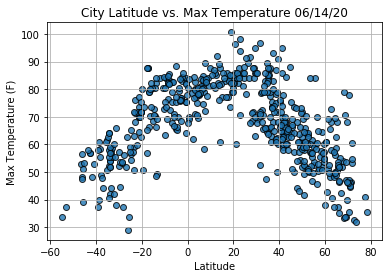

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

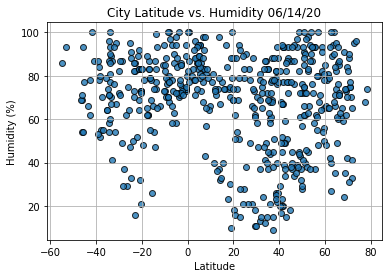

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

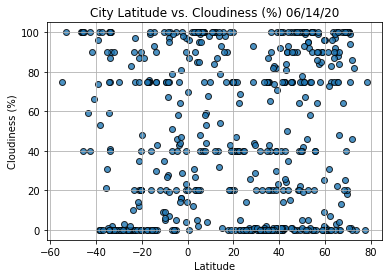

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

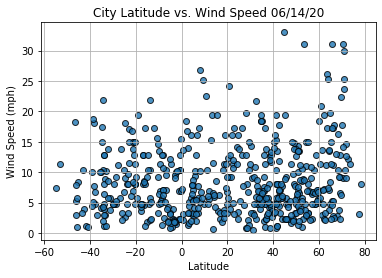

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()